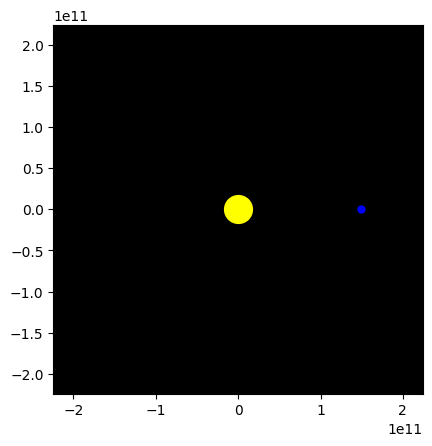

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Costanti
AU = 1.496e11  # Unità astronomica (in metri)
orbital_period = 365.25 * 24 * 3600  # Periodo orbitale in secondi (365,25 giorni)
T_simulation = 1000000 * 365.25 * 24 * 3600  # Tempo di simulazione in secondi (1 milione di anni)
frames = 1000  # Numero totale di frame nell'animazione
time_per_frame = T_simulation / frames  # Intervallo di tempo simulato per frame

# Inizializzazione della figura e dell'asse
fig, ax = plt.subplots()
ax.set_xlim(-AU * 1.5, AU * 1.5)
ax.set_ylim(-AU * 1.5, AU * 1.5)
ax.set_aspect('equal')
ax.set_facecolor('black')

# Oggetti da animare
earth, = ax.plot([], [], 'o', color='blue', markersize=5)  # Terra
sun, = ax.plot(0, 0, 'o', color='yellow', markersize=20)  # Sole

# Funzione di inizializzazione
def init():
    earth.set_data([], [])
    return earth,

# Funzione di aggiornamento per l'animazione
def update(frame):
    # Calcolo il tempo simulato corrispondente al frame corrente
    time_elapsed = frame * time_per_frame
    # Calcolo la posizione della Terra in base al tempo simulato
    angle = 2 * np.pi * (time_elapsed % orbital_period) / orbital_period  # Angolo in radianti
    x = AU * np.cos(angle)
    y = AU * np.sin(angle)
    earth.set_data([x], [y])  # Inserire x e y come sequenze
    return earth,

# Creazione dell'animazione
ani = FuncAnimation(fig, update, frames=frames, init_func=init, blit=True)

# Salvataggio dell'animazione
ani.save('earth_orbit_million_years.mp4', writer='ffmpeg', fps=30)

plt.show()
